Using the reviews collected from Turtle Games’ e-store, identify the customer sentiments based on their reviews for toys and games.

- What is the general sentiment of customers across all products?
- Based on the polarity of the sentiment, what are the top 20 positive and top 20 negative reviews?

Overview of steps taken:

importing NLTK, re (regular expression) and word cloud libraries in python 
Exploring dataset, removing missing values, transforming words to lower case and removing punctuation marks in “review text” column and checking for duplicates 
Converting the text into tokens which are smaller units of a piece of text from the reviews to interpret the meaning by analysing the sequences of the words.
Eliminating stop words using the (set(stopwords.words(‘english'))) syntax from NLTK
Visualising the most frequently occurring words in a WordCloud and bar chart. 


In [1]:
# Import all necessary libraries.
import nltk
import pandas as pd 
import re 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

/Users/mohabarikbin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import data 
reviews = pd.read_csv("game_reviews.csv")
# viewed the data
reviews.head() 

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [3]:
reviews.shape

(15000, 9)

In [4]:
# find number of missing values 
sum(reviews['reviewText'].isna())

10

In [5]:
# removed all the missing values.
reviews.dropna(subset=["reviewText"], inplace = True)
reviews.shape

(14990, 9)

In [8]:
# drop unverfied reviews 

reviews1 = reviews[reviews['verified'] == 1]
 

reviews1.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN
5,5,True,"01 27, 2017",A1J86V48S4KRJE,Cynthia A. Evoniuk,Grandson loves,Five Stars,1485475200,NaN
7,5,True,"12 17, 2016",A2UKOWP9ICU416,anon9df0,Came in perfect condition.,Five Stars,1481932800,NaN


In [9]:
# convert the sentences into lowercase
reviews["reviewText"] = reviews["reviewText"].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews["reviewText"].head

<bound method NDFrame.head of 0        when it comes to a dm's screen, the space on t...
1        an open letter to galeforce9*: your unpainted ...
2        nice art, nice printing. why two panels are fi...
3        amazing buy! bought it as a gift for our new d...
4        as my review of gf9's previous screens these w...
                               ...                        
14995    garbage. broke after 1 use. absolutely ridicul...
14996    our granddaughter loves these as part of her b...
14997    got water in it after the first use. shorted o...
14998                  i like print vs digital scheduling.
14999    this has been our lifesaver! our 1 year old bo...
Name: reviewText, Length: 14990, dtype: object>

In [15]:
# remove punctuation marks throughout the column
reviews["reviewText"] = reviews["reviewText"].str.replace('[^\w\s]','')
reviews["reviewText"].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: reviewText, dtype: object

In [16]:
# get rid of the futurewarning message
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Check the column for duplicates, and remove them.
reviews.reviewText.duplicated().sum()
# drop 
reviews_c = reviews.drop_duplicates(subset=["reviewText"])
# reset index 
reviews_c.reset_index(inplace=True)

In [18]:
reviews_c.head()

,index,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,when it comes to a dms screen the space on the...,The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9 your unpainted mi...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,nice art nice printing why two panels are fill...,"pretty, but also pretty useless",1473638400,NaN
3,3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,amazing buy bought it as a gift for our new dm...,Five Stars,1488412800,NaN
4,4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,as my review of gf9s previous screens these we...,Money trap,1486512000,NaN


In [19]:
# create prelimanry visuals 
all_reviews = ''
for i in range(reviews_c.shape[0]):
    all_reviews = all_reviews + reviews_c["reviewText"][i]


In [20]:
wordcloud = WordCloud(width = 1500, height = 500, 
                background_color ='white',
                colormap ='plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

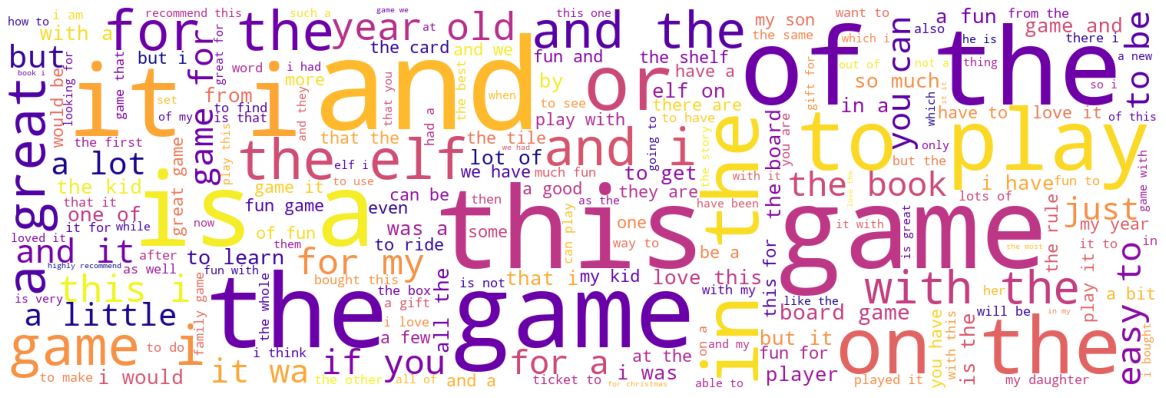

In [21]:
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## tokenize 

In [22]:
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Convert the text into tokens
reviews_c['tokens'] = reviews_c["reviewText"].apply(word_tokenize)
reviews_c['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [23]:
all_tokens = []

for i in range(reviews_c.shape[0]):
    all_tokens = all_tokens + reviews_c["tokens"][i]

In [24]:
# Compute the tokens with the maximum frequency
from nltk.probability import FreqDist

# count frequencies 
fdist = FreqDist(all_tokens)
fdist

FreqDist({'the': 32797, 'to': 21453, 'and': 21000, 'a': 18570, 'it': 15144, 'i': 12845, 'game': 12379, 'this': 12257, 'is': 12169, 'of': 11815, ...})

In [28]:
# eliminate stop words 
#nltk.download ('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))

In [29]:
# remove any words that are in the English stop word set: 

tokens = [x for x in all_tokens if x.lower() not in english_stopwords]

tokens_string = ''

for value in tokens:
    # add each filtered token word to the string 
    tokens_string = tokens_string + value + ' '

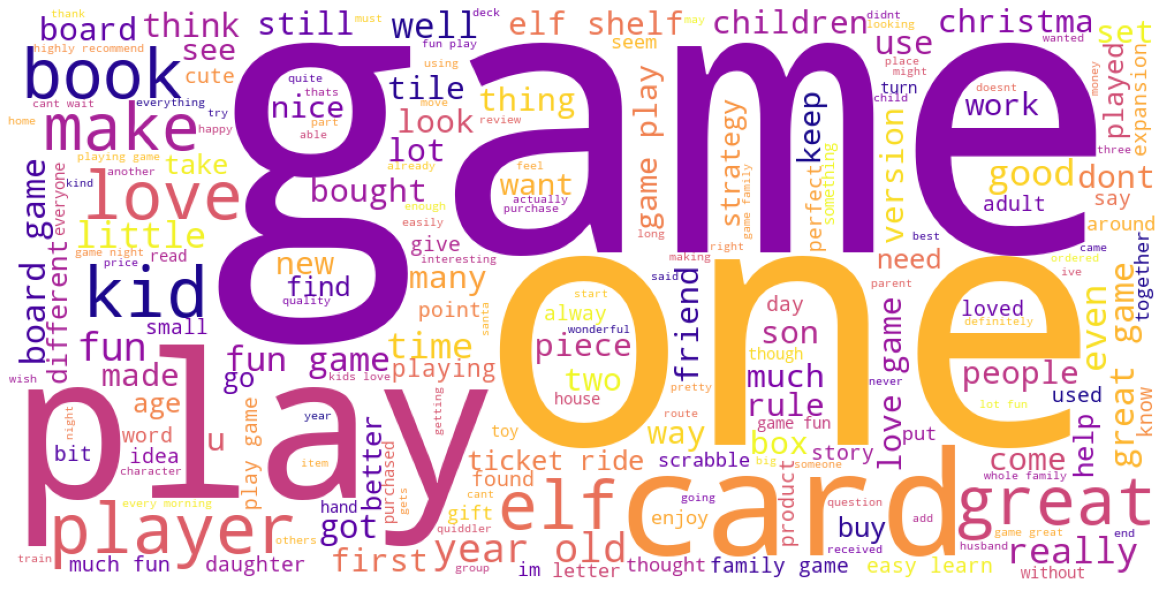

In [31]:
wordcloud = WordCloud(width = 1000, height = 500, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_string) 

# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [32]:
# View the frequency distribution of top 15 words in a dataframe and visualise:

In [33]:
from collections import Counter

# Generate DF out of Counter for 15 most common words: 
tokens_df = pd.DataFrame(Counter(tokens).most_common(15),
                    columns=['Word', 'Frequency']).set_index('Word')
tokens_df

,Frequency
Word,
game,12379
fun,5188
play,4150
great,4098
elf,3285
love,3031
one,2982
family,2818
kids,2499


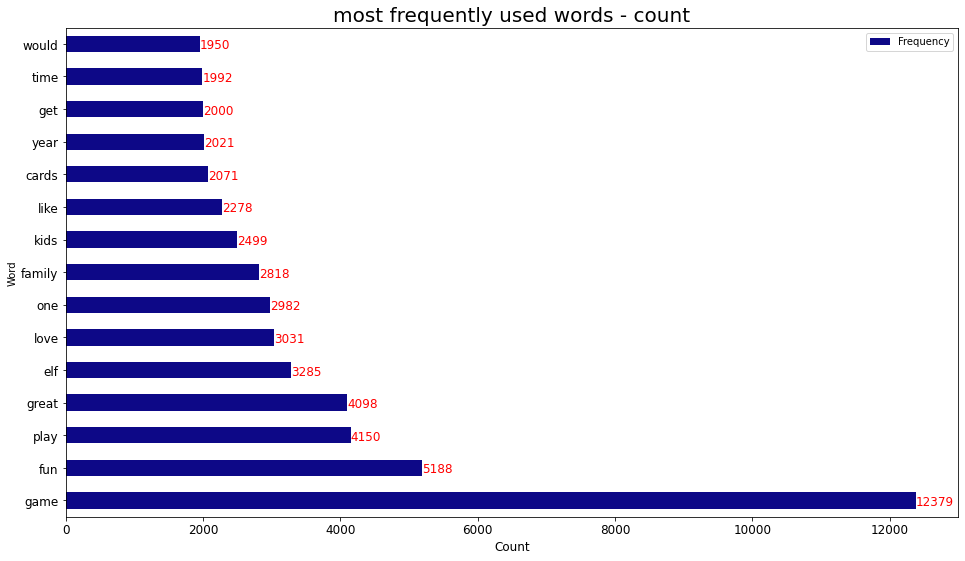

In [34]:
# visualise using a graph bar: 
ax = tokens_df.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap ='plasma')
ax.set_xlabel("Count", fontsize=12)
ax.set_title("most frequently used words - count", fontsize=20)

for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=12, color='red')

## Generate the polarity score

In [35]:
# Install TextBlob
#!pip install textblob

# Import
from textblob import TextBlob

In [36]:
# Define a function to extract a polarity score for comments.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
reviews_c['polarity'] = reviews_c['reviewText'].apply(generate_polarity)

# Preview the result.
reviews_c['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

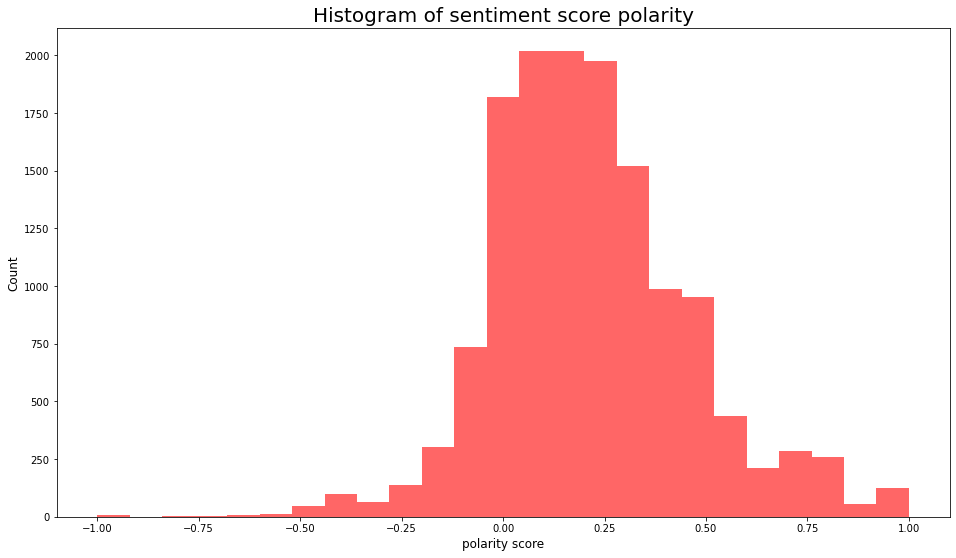

In [37]:
# visualise polarity 
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews_c['polarity'], num_bins, color='red', alpha=0.6)

# Set the labels.
plt.xlabel('polarity score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show();


In [42]:
# Identify the top 20 positive and top 20 negative reviews from the data, and save them as two separate CSV files.

In [50]:
# save top 20 positive reviews as csv 
# Create a DataFrame.
reviews_pos = reviews_c.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
reviews_pos = reviews_pos[['reviewText', 'polarity', 'reviewerID']]

# Adjust the column width.
reviews_pos.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,reviewText,polarity,reviewerID
7,came in perfect condition,1.000000,A2UKOWP9ICU416
164,awesome book,1.000000,A9V7MUGGFFT7R
193,awesome gift,1.000000,A2D0AVXUJVHK1T
489,excellent activity for teaching selfmanagement skills,1.000000,A273OOTSQQP8ID
517,perfect just what i ordered,1.000000,A3GYWP2LZYRDLI
583,wonderful product,1.000000,A1K1J2TG88SOH8
601,delightful product,1.000000,A2MW38KK7OMHBX
613,wonderful for my grandson to learn the resurrection story,1.000000,A1FWWIJKFY48O
782,perfect,1.000000,A1ZSF3GAJMDLIJ
922,awesome,1.000000,A32YPU6CNW8U33


In [51]:
# save as CSV file
reviews_pos.to_csv('reviews_pos.csv')

In [49]:
# save top 20 negative reviews as csv 
# Create a DataFrame.
reviews_neg = reviews_c.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
reviews_neg = reviews_neg[['reviewText', 'polarity', 'reviewerID']]

# Adjust the column width.
reviews_neg.style.set_properties(subset=['reviewText'], **{'width': '1200px'})


,reviewText,polarity,reviewerID
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000,A3SCMMOUFRA9VK
1987,kids did not like it thought it was boring,-1.000000,A28APXX53Y3OBG
3218,some of the suggestions are disgusting,-1.000000,A29ZPOASXZI493
7812,awful we did not receive what was advertised we paid 30 for the boxes set with book we got the elf in a bag without the book,-1.000000,A1NA67C1C1ESRB
7515,was the elf on the shelf but it didnt have the dvd i was very disappointed,-0.975000,A3S8TI3M8BCBRA
8861,i havent even taken it out of the box yet but its already falling apart i contacted customer service and never even got a response i am very disappointed in this product,-0.975000,A35OX0453C1M70
8198,i hate the holidays bcuz of the elf he was disgusting i hate him with my life he doesnot leave the shelf alone,-0.866667,A1XPH67ENP7SHV
12386,i do not under stand how you keep score or read the scoring i i do not like that at all i can never play score with anyone at all i hate that i cant play points,-0.800000,A1YGHW8VZ3GPRV
8531,cliche and stupid i should not drink and amazon,-0.800000,A3A522DVPJNI4D
8638,just stupid,-0.800000,AUBU47RORRSMB


In [48]:
# save as CSV file
reviews_neg.to_csv('reviews_neg.csv')